<a href="https://colab.research.google.com/github/SushanthKN/Sushanthkn/blob/master/Sushanth_KN_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


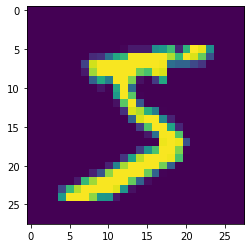

In [360]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [361]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

X_train = X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/= 255
X_test/= 255
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [362]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [363]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(32,3,3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10,1,activation='relu'))
model.add(Convolution2D(10,12))
model.add(Convolution2D(10,15))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 15, 15, 10)        14410     
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 1, 1, 10)          22510     
_________________________________________________________________
flatten_26 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_26 (Activation)   (None, 10)                0         
Total params: 37,570
Trainable params: 37,570
Non-trainable params: 0
_________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


In [0]:
score=model.evaluate(X_test, Y_test, verbose=1)
print(score)